# Pet Friendly Neighborhoods

Submetric: the number of dogs in the neighborhood, which is based off the number of dog licenses in the neighborhood.

Clearly, dogs would do better in a neighborhood where there are plenty of other dogs to socialize with and where neighbors are used to having dogs around, but not too many or your dog might get into fights.

In [756]:
import pandas as pd
import geopandas as gpd

In [758]:
# import the dog license data
data = pd.read_csv("dogs_valid.csv")

# drop duplicates
data.drop_duplicates()

# display first 5 data points
data.head(5)

,_id,LicenseType,Breed,Color,DogName,OwnerZip,ExpYear,ValidDate
0,23445643,Dog Lifetime Spayed Female,LABRADOR RETRIEVER,YELLOW,SASHA,15137,2099,2005-01-31T00:00:00
1,23445644,Dog Lifetime Neutered Male,LABRADOR RETRIEVER,BROWN,JAKE,15129,2099,2004-06-21T00:00:00
2,23445645,Dog Lifetime Spayed Female,MIXED,SPOTTED,SHILOH,15129,2099,2006-01-20T00:00:00
3,23445646,Dog Lifetime Spayed Female,LAB MIX,BROWN,BLONDIE,15140,2099,2005-07-18T00:00:00
4,23445647,Dog Lifetime Spayed Female,AUS SHEPHERD,MULTI,SASHA,15238,2099,2004-02-25T00:00:00


In [760]:
# sort data by zip code of dog licenses, and presumably 
# dogs
data.groupby("OwnerZip").count()

,_id,LicenseType,Breed,Color,DogName,ExpYear,ValidDate
OwnerZip,,,,,,,
15003,34,34,34,34,34,34,34
15005,55,55,55,55,55,55,55
15006,10,10,10,10,10,10,10
15007,10,10,10,10,10,10,10
15012,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...
16342,1,1,1,1,1,1,1
32081,1,1,1,1,1,1,1
33426,1,1,1,1,1,1,1


In [762]:
# average number of dog licenses in Pittsburgh neighborhoods
data.groupby("OwnerZip").count().mean()

_id            350.099237
LicenseType    350.099237
Breed          350.091603
Color          349.770992
DogName        350.099237
ExpYear        350.099237
ValidDate      350.099237
dtype: float64

In [764]:
# some areas don't seem to have a lot of dogs and some have too many, so we will filter those out
def min(x):
    return len(x) > 250

def max(x):
    return len(x) < 450

pop_zip = data.groupby("OwnerZip").filter(min)
avg_zip = pop_zip.groupby("OwnerZip").filter(max)

# display count by zip code again
zipCodes = avg_zip.groupby("OwnerZip").count()
zipCodes

,_id,LicenseType,Breed,Color,DogName,ExpYear,ValidDate
OwnerZip,,,,,,,
15045,257,257,257,257,257,257,257
15057,349,349,349,349,349,349,349
15068,405,405,405,405,405,405,405
15071,412,412,412,411,412,412,412
15126,274,274,274,274,274,274,274
15135,382,382,382,381,382,382,382
15139,342,342,342,342,342,342,342
15144,289,289,289,289,289,289,289
15215,412,412,412,412,412,412,412


In [766]:
# sort high to low
sorted = zipCodes.sort_values("_id", ascending = False)
sorted

,_id,LicenseType,Breed,Color,DogName,ExpYear,ValidDate
OwnerZip,,,,,,,
15071,412,412,412,411,412,412,412
15215,412,412,412,412,412,412,412
15216,406,406,406,405,406,406,406
15068,405,405,405,405,405,405,405
15135,382,382,382,381,382,382,382
15057,349,349,349,349,349,349,349
15139,342,342,342,342,342,342,342
15218,342,342,342,342,342,342,342
15220,307,307,307,307,307,307,307


In [768]:
# take the top zip codes
top = sorted.head(15)
# top

In [780]:
#top = top[top.columns[1]]
#neighborhoods = ["Oakmont", "Aspinwall", "Dormont", "Near McKeesport", "Penn Hills", "Near Elizabeth", "Near White Oak", "Swissvale", "West End", "Etna", "Near Murrysville", "Near North Versailles", "Near Braddock"]
#top.concat(neighborhoods)

<Axes: xlabel='OwnerZip'>

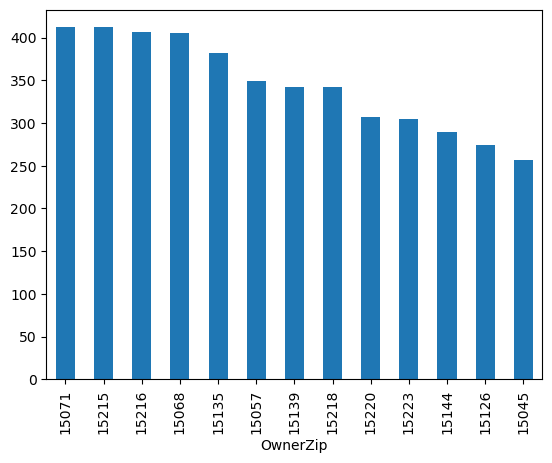

In [772]:
top.plot.bar()

# Conclusion
From this, we see that the neighborhoods with the greatest number of dogs (from converting zip codes to neighborhoods) are McCandless, South Park, Coraopolis, Sewickley, Bridgeville, Penn Hills, Murraysville, Aliquippa, McKeesport, Baldwin, West Mifflin, White Oak, West Newton, Charleroi

# Conclusion
From this, we see that the neighborhoods with the greatest number of dogs (from converting zip codes to neighborhoods) are McCandless, South Park, Coraopolis, Sewickley, Bridgeville, Penn Hills, Murraysville, Aliquippa, McKeesport, Baldwin, West Mifflin, White Oak, West Newton, McKeesport, Charleroi

In [670]:
#custom_index = pd.Series(['15237', '15236', '15108', '15044', '15102', '15235', '15239', '15101', '15122', '15227'])
#neighborhoods = pd.Series(['McCandless', 'South Park', 'Coraopolis', 'Sewickley', 'Bridgeville', 'Penn Hills', 'Murrysville', 'Aliquippa', 'McKeesport', 'Baldwin'])
#neighborhood_series = pd.Series(neighborhoods, index = custom_index)
#neighborhood_series
#type(neighborhood_series)
#type(top)
#together = pd.concat([top, neighborhood_series], axis=1)
#together

In [678]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
#neighborhoods.head(20)
#neighborhoods.plot()

In [ ]:
#neighborhoods.merge(area, how='left', left_on='', right_on='neighborhood') 